In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [3]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\Sandhya\\Downloads\\medicinal plants images",
    target_size=(224, 224),  # Image size should match ResNet input
    batch_size=32,
    class_mode='categorical'
)

Found 181 images belonging to 7 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
    "C:\\Users\\Sandhya\\Downloads\\medicinal plants images",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 181 images belonging to 7 classes.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
base_model.trainable = False

In [9]:
model = Sequential([
    base_model,
    Flatten(),  # Flatten the output from the base model
    Dense(512, activation='relu'),  # Add a fully connected layer
    Dropout(0.5),  # Add dropout for regularization
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,972,039 (286.00 MB)

 Trainable params: 51,384,327 (196.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Start with a few epochs, can be increased
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10


c:\Users\Sandhya\Downloads\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 0.1094 - loss: 3.3221 - val_accuracy: 0.1750 - val_loss: 2.4813
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1562 - loss: 3.4326

c:\Users\Sandhya\Downloads\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - accuracy: 0.1562 - loss: 3.4326 - val_accuracy: 0.0952 - val_loss: 2.5503
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.2003 - loss: 2.7986 - val_accuracy: 0.2625 - val_loss: 2.1110
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.2188 - loss: 2.8451 - val_accuracy: 0.0952 - val_loss: 2.2814
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.1741 - loss: 2.5358 - val_accuracy: 0.2250 - val_loss: 1.8320
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.1875 - loss: 2.0065 - val_accuracy: 0.1905 - val_loss: 1.8715
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2511 - loss: 2.1640 - val_accuracy: 0.2438 - val_loss: 1.7330
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.1875 - loss: 1.9422 - val_accuracy: 0.2857 - val_loss: 1.6722
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2500 - loss: 1.8634 - val_accuracy: 0.3313 - val_loss: 1.7163
Epoch 10/10

In [13]:
model.save('medicinal_plant_resnet_model.h5')

In [14]:
import matplotlib.pyplot as plt

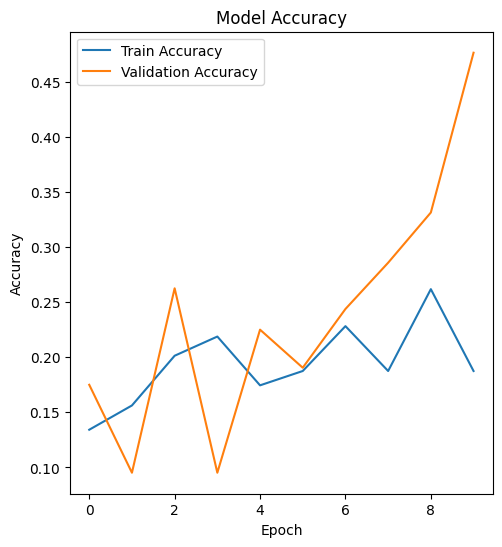

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

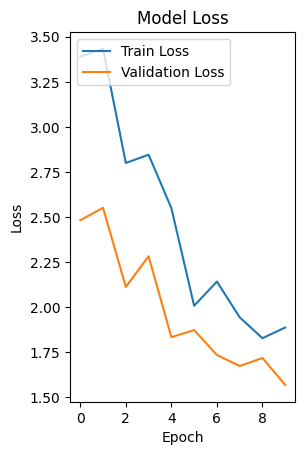

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
base_model.trainable = True

In [19]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 283s 25s/step - accuracy: 0.1792 - loss: 3.8208 - val_accuracy: 0.3438 - val_loss: 1.7217
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 1:15 19s/step - accuracy: 0.2188 - loss: 2.3706

c:\Users\Sandhya\Downloads\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 578ms/step - accuracy: 0.2188 - loss: 2.3706 - val_accuracy: 0.2857 - val_loss: 1.6802
Epoch 3/10
3/5 ━━━━━━━━━━━━━━━━━━━━ 36s 18s/step - accuracy: 0.3057 - loss: 2.1494

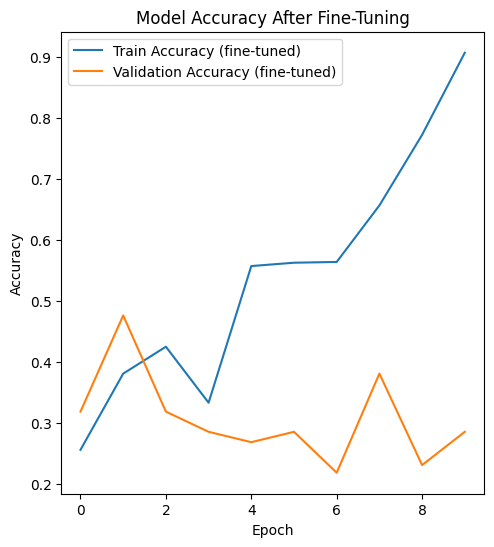

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy (fine-tuned)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy (fine-tuned)')
plt.title('Model Accuracy After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

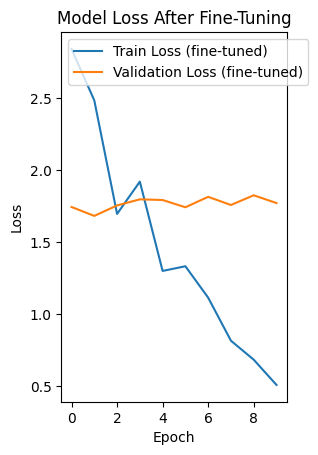

In [23]:
plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history['loss'], label='Train Loss (fine-tuned)')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss (fine-tuned)')
plt.title('Model Loss After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [24]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [1]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import visualkeras
visualkeras.layered_view(model)

NameError: name 'model' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn
import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [4]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(22,)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5), 
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(20, activation='sigmoid')
    ])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'l2' is not defined